In [ ]:
!pip install gsw
!pip install neutralocean==2.1.3
!pip install fiona
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.5 MB/s eta 0:00:00


In [ ]:
#Make file downloads
!wget https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav81B0/1.00/woa18_decav81B0_t00_01.nc
!wget https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/salinity/decav81B0/1.00/woa18_decav81B0_s00_01.nc
!gdown 12snZsGtnGvD8mX3Xvayh055ePmrhEibc
!gdown 1I2pga_DuoeCS8Ho3OhhOvvGf1I2C9ZeQ
!gdown 15wUXBvvDamZ85M_JzPzLbw4f8DBz74KN
!gdown 12wBm0VbntS1pOokCM_GJpbSlfFLGWP4K
!gdown 1aMzMV-4tifubnbs61HSNFg0GfDg_inTy
!gdown 1zSbiPWLf9eGuL_t0PBw59drabnKcK4lZ

--2025-11-12 23:54:17--  https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav81B0/1.00/woa18_decav81B0_t00_01.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.168, 205.167.25.171, 205.167.25.167, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.168|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 185103667 (177M) [application/x-netcdf]
Saving to: ‘woa18_decav81B0_t00_01.nc’

woa18_decav81B0_t00 100%[===================>] 176.53M  76.1MB/s    in 2.3s    

2025-11-12 23:54:20 (76.1 MB/s) - ‘woa18_decav81B0_t00_01.nc’ saved [185103667/185103667]

--2025-11-12 23:54:20--  https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/salinity/decav81B0/1.00/woa18_decav81B0_s00_01.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.168, 205.167.25.171, 205.167.25.167, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.168|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
!gdown 1zSbiPWLf9eGuL_t0PBw59drabnKcK4lZ

Downloading...
From: https://drive.google.com/uc?id=1zSbiPWLf9eGuL_t0PBw59drabnKcK4lZ
To: /content/50S_20S.kml
100% 4.60k/4.60k [00:00<00:00, 14.7MB/s]


In [ ]:
import xarray as xr
import gsw

# Import functions to create the Equation of State
from neutralocean.eos import make_eos, make_eos_s_t

# Import functions to calculate various approximately neutral surfaces
from neutralocean.surface import potential_surf, anomaly_surf, omega_surf

# Import functions to build a rectangular grid and convert edge data to maps
from neutralocean.grid.rectilinear import build_grid, edgedata_to_maps

# Temperature and salinity data from WOA
temp = xr.open_dataset("woa18_decav81B0_t00_01.nc", decode_times=False)
sal = xr.open_dataset("woa18_decav81B0_s00_01.nc", decode_times=False)

press = gsw.p_from_z(-temp.depth, 0)
sal = gsw.SA_from_SP(sal.s_an, press, sal.lon, sal.lat)
temp = gsw.CT_from_t(sal, temp.t_an, press)

Seleciona as variáveis

In [ ]:
T = temp
S = sal

In [ ]:
# Data for the grid: time, depth, longitude, and latitude; the important ones are longitude (ni) and latitude (nj)
t, nk, ni, nj = S.shape

In [ ]:
# Get the depth values
Z = S.depth.values

### Build the grid using only `ni` and `nj` values. (False, True) depends on the grid format.
Email from geoff: if your data is arranged with latitude as the first dimension and longitude as the second dimension (and depth as the third dimension), then this would be (False, True). In the OCCA example, we have S.shape = (360, 160, 50), which is (longitude, latitude, depth), so g["wrap"] is (True, False).


In [ ]:
grid = build_grid(
    (ni, nj), (False, True))

# Create the data for the density surface.
s --> Salinity associated with it,
t --> Temperature associated with it,
z --> Depth associated with it,
d --> General surface data

In [ ]:
# Here I am selecting the isopycnal surface of 1027.2 sigma_0
# z returns the depth of the isopycnal surface
s, t, z, d = potential_surf(
    S,
    T,
    Z,
    grid=grid,
    eos="jmd95",
    grav=9.81,
    rho_c=1035.0,
    vert_dim="depth",
    ref=0.0,
    isoval=1027.2,
)

potential done |       32417 wet casts | RMS(ϵ) = 1.27916880e-03  | 7.377 sec


In [ ]:
import geopandas as gpd
import fiona
fiona.drvsupport.supported_drivers['KML'] = 'rw'
area1 = gpd.read_file('50S_20S.kml', driver="KML")
area2 = gpd.read_file('25S_20N.kml', driver="KML")
area_conjunto = gpd.read_file('Regiao_Juntas.shp')

In [ ]:
from matplotlib.ticker import FuncFormatter

# --- Formatters for coordinates ---
def format_lon(x, pos):
    x = float(x)
    if x < 0:
        return f"{abs(x):.0f}°W"
    elif x > 0:
        return f"{x:.0f}°E"
    else:
        return "0°"

def format_lat(y, pos):
    y = float(y)
    if y < 0:
        return f"{abs(y):.0f}°S"
    elif y > 0:
        return f"{y:.0f}°N"
    else:
        return "0°"

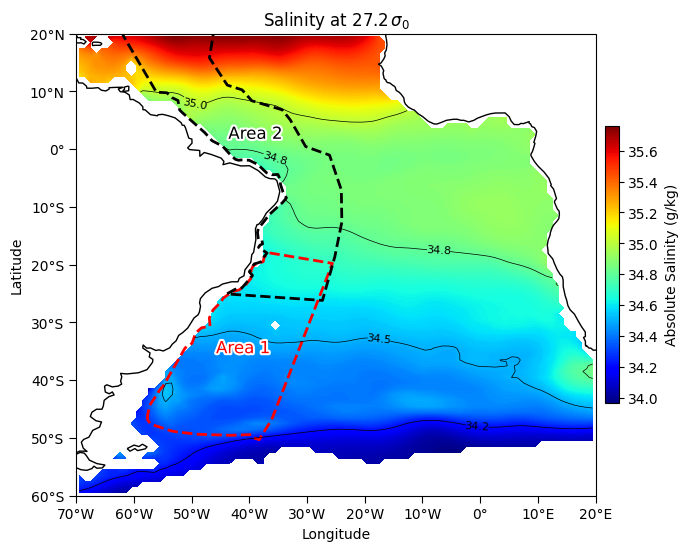

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import fiona
import numpy as np
import matplotlib.patheffects as PathEffects  # Import to add text effects
import warnings
warnings.filterwarnings('ignore')

# Configuration to support KML files
fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Load the areas of interest from KML files
area1 = gpd.read_file('50S_20S.kml', driver="KML")
area2 = gpd.read_file('25S_20N.kml', driver="KML")

# Define the limits of Brazil in terms of latitude and longitude
lat_min, lat_max = -60, 20.0  # Approximately the extent of Brazil
lon_min, lon_max = -70, 20.0

# Clip the DataArray to the Brazil region
data_brasil = s.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add coastlines and other geographic features
ax.add_feature(cfeature.COASTLINE)

# Add ticks to the axes
ax.set_xticks(np.arange(lon_min, lon_max + 10, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_min, lat_max + 10, 10), crs=ccrs.PlateCarree())
# Apply formatters
ax.xaxis.set_major_formatter(FuncFormatter(format_lon))
ax.yaxis.set_major_formatter(FuncFormatter(format_lat))

# Customize tick appearance
ax.tick_params(axis='both', which='both', length=5, color='black', direction='out', labelsize=10)

# Plot the data with the custom colorbar
contour = data_brasil.isel(time=0).plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='jet',
    add_colorbar=False,  # Does not automatically add the colorbar
    levels=500
)

# Add colorbar manually
cbar = fig.colorbar(contour, ax=ax, orientation='vertical', pad=0.01, shrink=0.6)
cbar.set_label('Absolute Salinity (g/kg)')  # Defines the colorbar title
# Define the colorbar ticks
cbar_ticks = np.arange(34, 35.6, 0.2)  # Ticks from 34 to 35.6 with a 0.4 interval
cbar.set_ticks(cbar_ticks)  # Define the ticks on the colorbar
cbar.minorticks_off()

# Add contour lines
contour = data_brasil.isel(time=0).plot.contour(
    ax=ax,
    transform=ccrs.PlateCarree(),
    colors='black',  # Contour line color
    linewidths=0.5,  # Contour line width
    levels=[34.2, 34.5, 34.8, 35]  # Contour levels
)

# Add labels to contours
ax.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

# Plot the KML file areas
area1.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), linestyle='--')
area2.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), linestyle='--')

# Calculate the centroid of the areas
centroid_area1 = area1.geometry.centroid
centroid_area2 = area2.geometry.centroid

# Add text to the center of the regions with a white border
txt1 = ax.text(centroid_area1.x, centroid_area1.y, 'Area 1', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='red')
txt1.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])  # Add white border

txt2 = ax.text(centroid_area2.x, centroid_area2.y+4, 'Area 2', transform=ccrs.PlateCarree(), fontsize=12, ha='center', color='black')
txt2.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])  # Add white border

# Add title and show the plot
plt.title(r"Salinity at $27.2 \, \sigma_0$")
plt.savefig("Plot_Salinity_Map.png", dpi=600, bbox_inches='tight')
plt.show()